# Clustering de clientes

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
df_tickets = pd.read_csv('data/tickets.csv')

## 1. Preprocesamiento

In [3]:
# Variables númericas
df_cluster = df_tickets[['duracion_min', 'dispositivos_conectados', 'total_usd']].copy()

# One-hot encoding para tipo_visita y proposito
df_encoded = pd.get_dummies(df_tickets[['tipo_visita', 'proposito']], drop_first=True)

# Combinamos los datos
df_cluster = pd.concat([df_cluster, df_encoded], axis=1)

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

## 2. Determinar número óptimo de clusters, usando el méto-do del codo

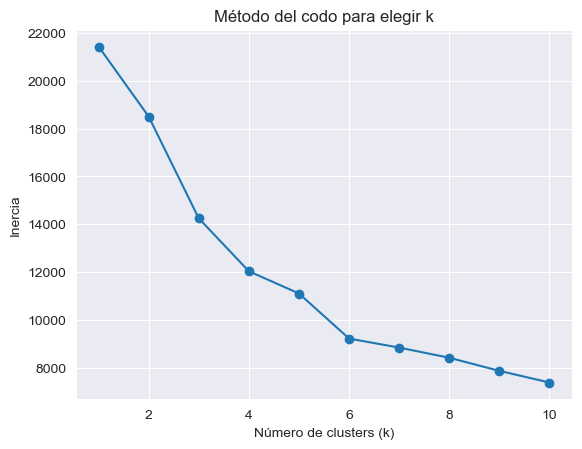

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para elegir k')
plt.show()

## 3. Aplicamos K-Means

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(df_scaled)

## 4. Analizamos los clusters

In [6]:
df_tickets['cluster'] = df_cluster['cluster']
df_tickets.groupby('cluster').mean(numeric_only=True)

,ticket_id,duracion_min,dispositivos_conectados,total_usd
cluster,,,,
0,1353.551813,89.351036,1.546632,6.879145
1,1313.242068,89.996475,3.258519,6.757932
2,1351.656250,89.619318,1.520833,6.632481
